## Damage and Loss Assessment (12-story RC frame)

This example continues the example2 to conduct damage and loss assessment using the PLoM model and compare the results against the results based on MSA

### Run example2

2021-09-20 04:04:54.544384  RUNNING-MSG --NEW LOG STARTING FROM THIS LINE-- 
2021-09-20 04:04:54.544922  RUNNING-MSG PLoM: Running directory /home/kuanshi/Documents/PLoM/IDA initialized. 
2021-09-20 04:04:54.561463  RUNNING-MSG PLoM: database server initialized. 
2021-09-20 04:04:54.561937  RUNNING-MSG PLoM: visualization folder /home/kuanshi/Documents/PLoM/IDA/FigOut initialized. 
2021-09-20 04:04:54.570219  RUNNING-MSG PLoM.load_data: loaded data size = (1059, 27). 
2021-09-20 04:04:54.600071  RUNNING-MSG PLoM.initialize_data: current X0 size = (1059, 27). 
2021-09-20 04:04:54.600473  RUNNING-MSG PLoM.initialize_data: X0 and X0_size saved to database. 


<IPython.core.display.Javascript object>


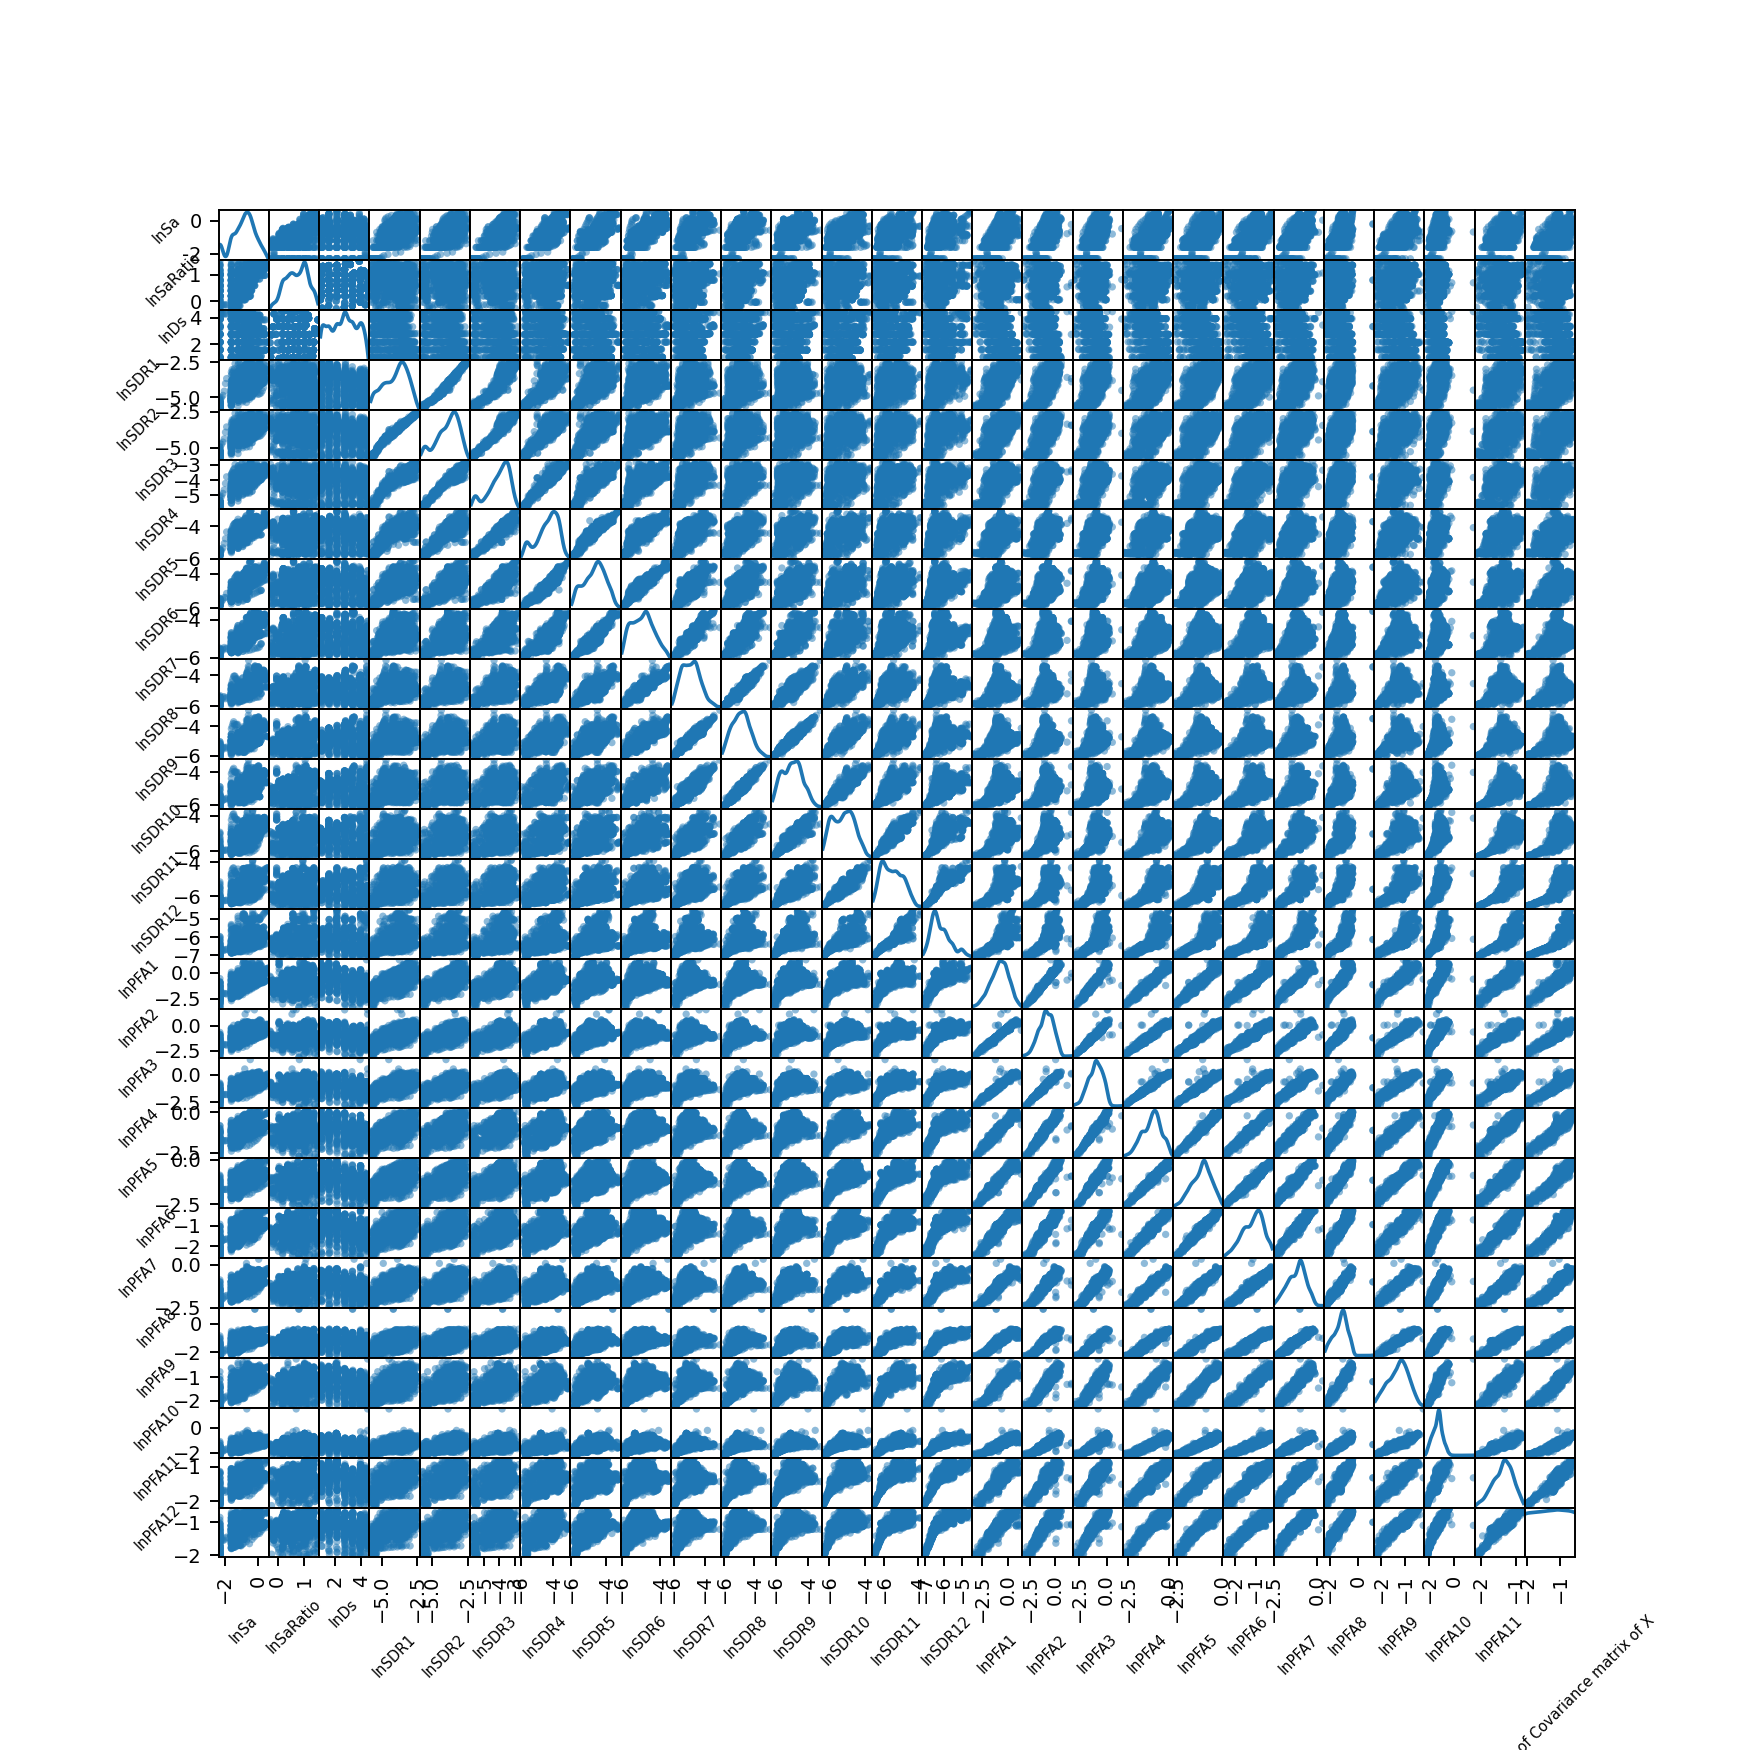

2021-09-20 04:05:17.915810  RUNNING-MSG PLoM: ScatterMatrix_X0.png saved in /home/kuanshi/Documents/PLoM/IDA/FigOut. 
2021-09-20 04:05:17.916394  WARNING-MSG PLoM.add_constraints: no user-defined constraint - please use add_constraints(constraints_file=X) to add new constraints if any. 
2021-09-20 04:05:17.916707  RUNNING-MSG PLoM: using RunAlgorithm(n_mc=n_mc,epsilon_pca=epsilon_pca,epsilon_kde) to run simulations. 
2021-09-20 04:05:18.005405  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: DataNormalization. 
2021-09-20 04:05:18.008065  RUNNING-MSG PLoM.RunAlgorithm: data normalization completed. 
2021-09-20 04:05:18.055896  RUNNING-MSG PLoM.RunAlgorithm: X_range, X_min, X_scaled and X_scaled_mean saved. 
2021-09-20 04:05:18.105604  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) DataNormalization done. 
2021-09-20 04:05:18.284911  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunPCA. 
2021-09-20 04:05:18.300980  RU

<IPython.core.display.Javascript object>


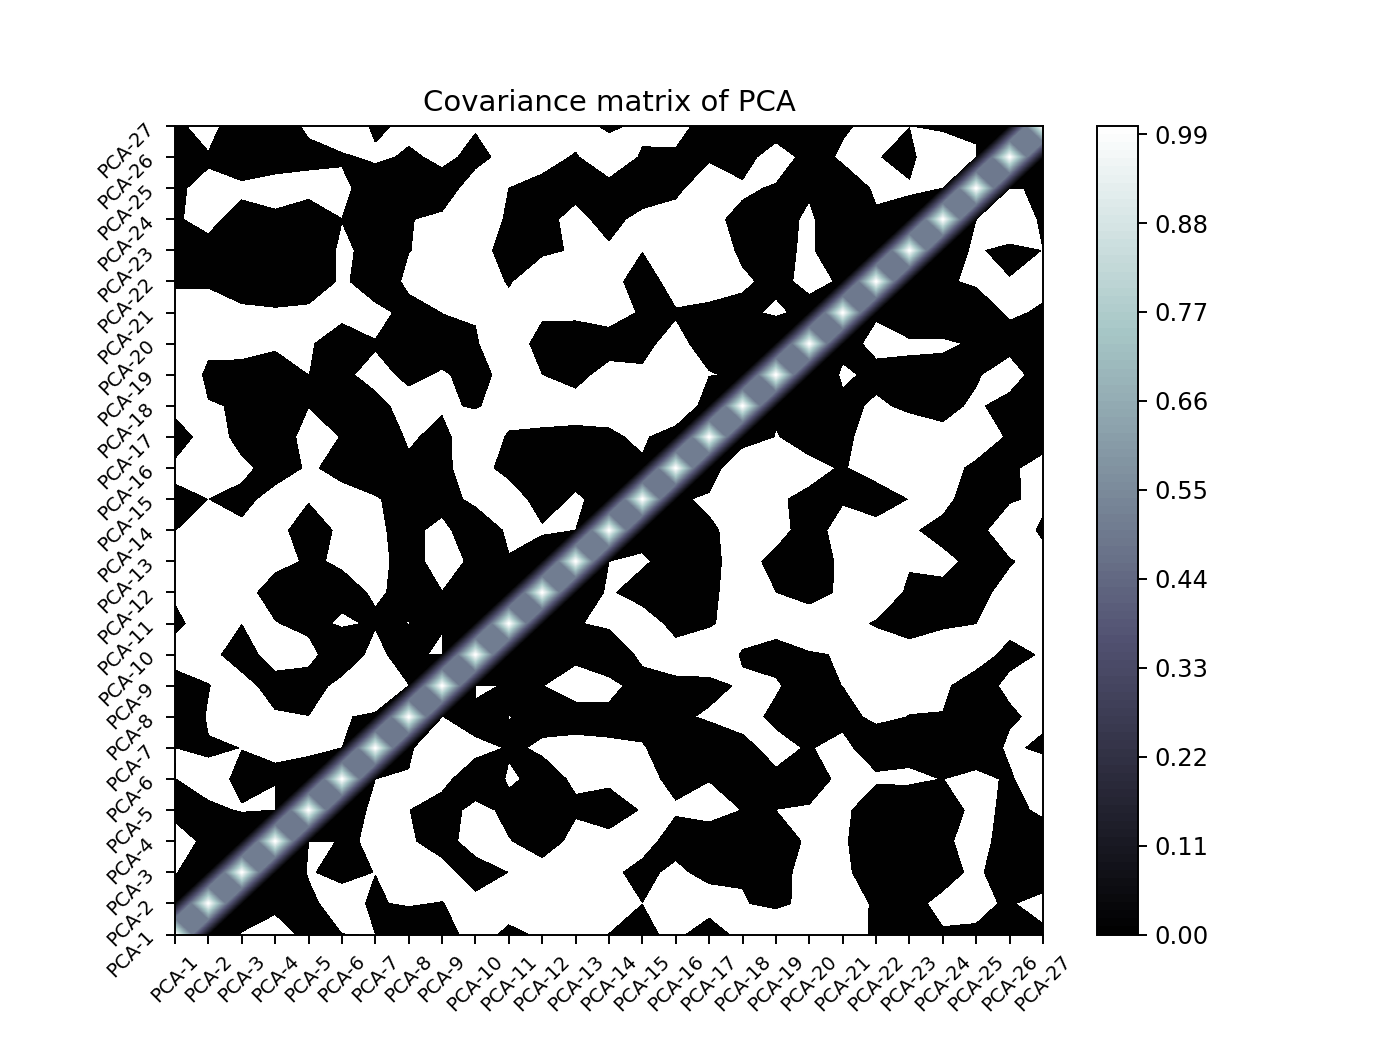

2021-09-20 04:05:19.057212  RUNNING-MSG PLoM: PCA_CovarianceMatrix.png saved in /home/kuanshi/Documents/PLoM/IDA/FigOut. 
2021-09-20 04:05:19.057773  RUNNING-MSG PLoM.RunAlgorithm: PCA completed. 
2021-09-20 04:05:19.094690  RUNNING-MSG PLoM.RunAlgorithm: X_PCA, EigenValue_PCA and EigenVector_PCA saved. 
2021-09-20 04:05:19.144369  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunPCA done. 
2021-09-20 04:05:19.387989  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunKDE. 
2021-09-20 04:05:24.939864  RUNNING-MSG PLoM.RunAlgorithm: kernel density estimation completed. 
2021-09-20 04:05:24.993231  RUNNING-MSG PLoM.RunAlgorithm: KDE, X_KDE and EigenValues_KDE saved. 


<IPython.core.display.Javascript object>


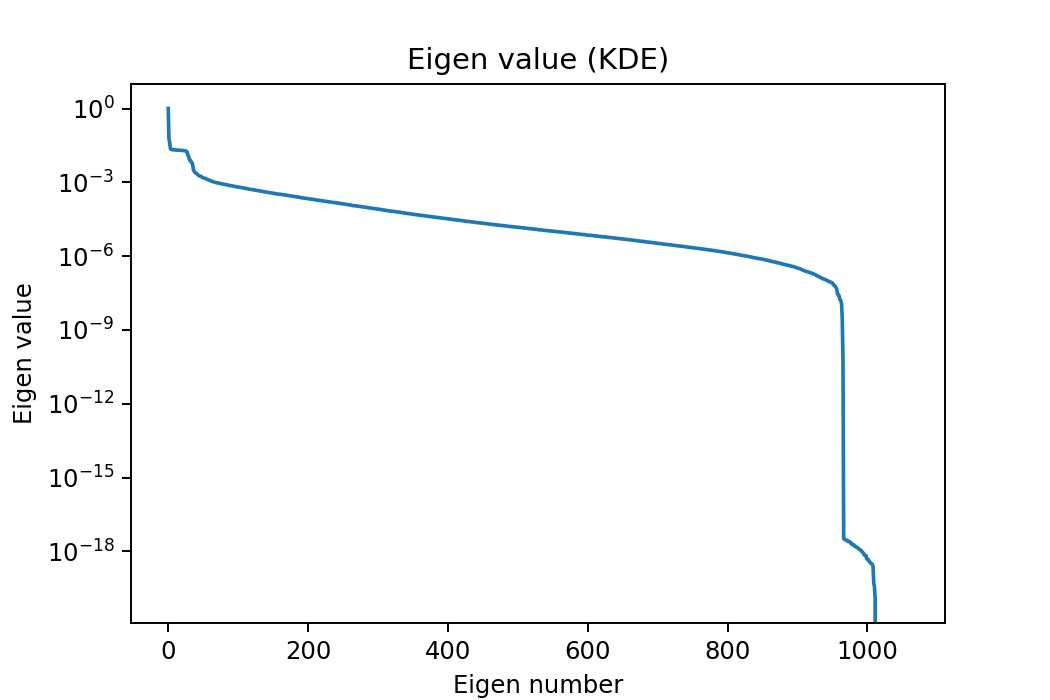

2021-09-20 04:05:25.438098  RUNNING-MSG PLoM: KDE_EigenValue.png saved in /home/kuanshi/Documents/PLoM/IDA/FigOut. 
2021-09-20 04:05:25.438642  RUNNING-MSG PLoM.RunAlgorithm: diffusion maps completed. 
2021-09-20 04:05:25.481596  RUNNING-MSG PLoM.RunAlgorithm: KDE_g, KDE_m, KDE_a and KDE_Z saved. 
2021-09-20 04:05:25.677649  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunKDE done. 
2021-09-20 04:05:26.093797  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: ISDEGeneration. 
delta t:  0.18844382365263854
2021-09-20 04:06:20.165379  RUNNING-MSG PLoM.ISDEGeneration: new generations are simulated. 
2021-09-20 04:06:20.184922  RUNNING-MSG PLoM.RunAlgorithm: Realizations generated. 
2021-09-20 04:06:20.204921  RUNNING-MSG PLoM.RunAlgorithm: X_new saved. 
2021-09-20 04:06:20.274109  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) ISDEGeneration done. 
2021-09-20 04:06:20.306677  RUNNING-MSG PLoM.export_results: available data /DS_E

<IPython.core.display.Javascript object>


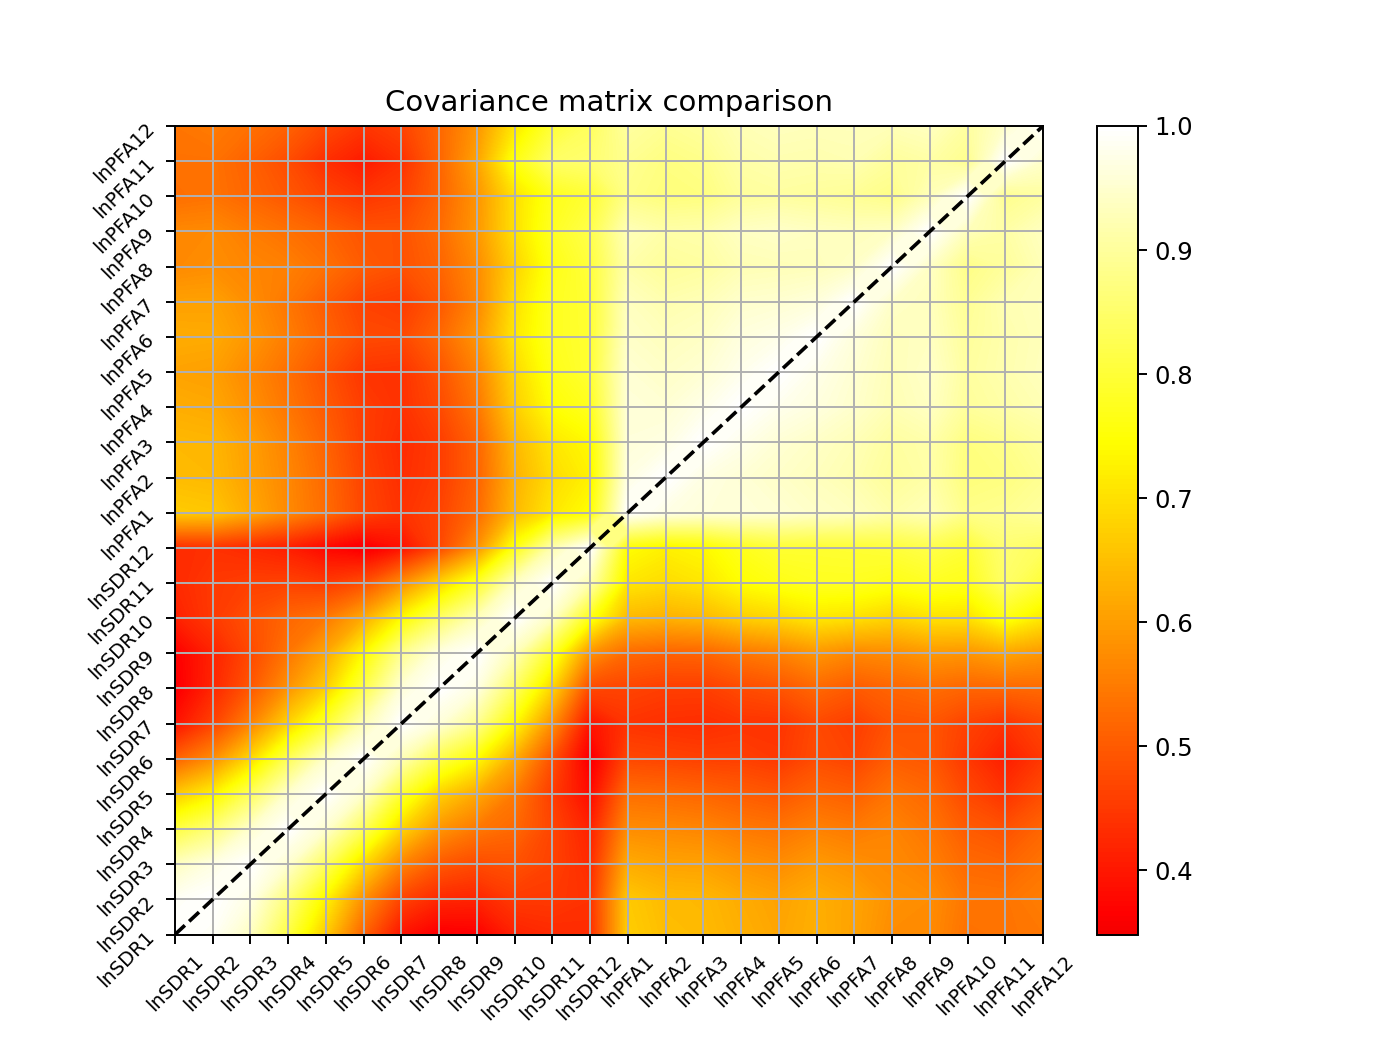

<IPython.core.display.Javascript object>


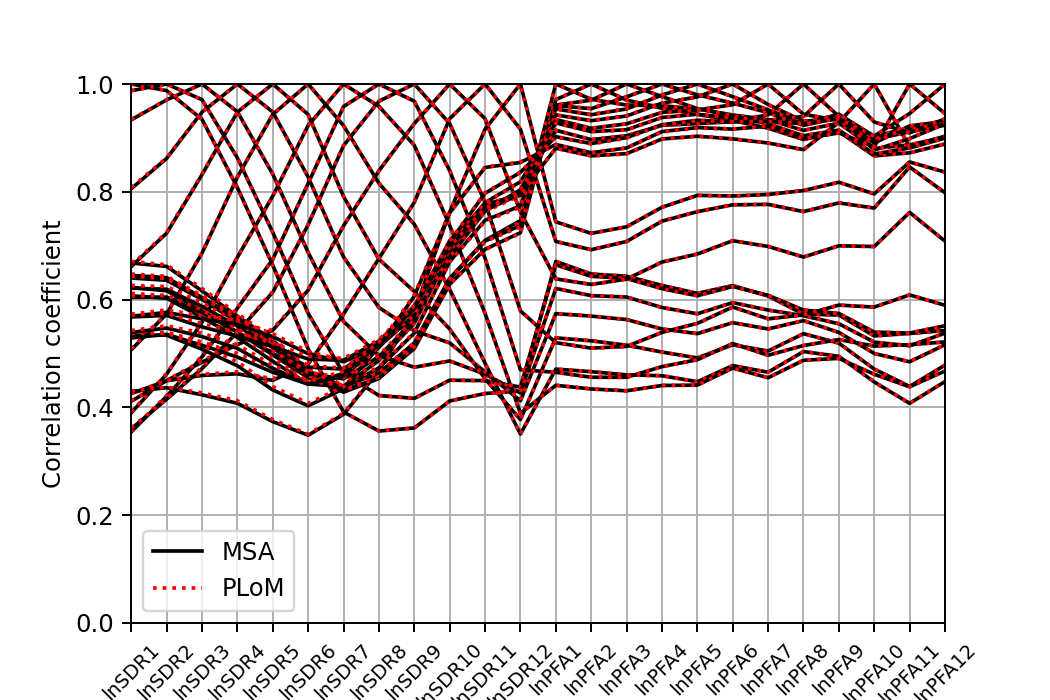

       Sa  mSaRatio       mDs     cov11     cov12     cov21   cov22
0  0.1690  0.494493  2.187499  0.073322 -0.011835 -0.011835  0.2306
1  0.2594  0.533634  2.150060  0.073322 -0.011835 -0.011835  0.2306
2  0.3696  0.586958  2.116164  0.073322 -0.011835 -0.011835  0.2306
3  0.5492  0.696371  2.124474  0.073322 -0.011835 -0.011835  0.2306
4  0.7131  0.815519  2.134961  0.073322 -0.011835 -0.011835  0.2306
5  0.9000  0.917086  2.228618  0.073322 -0.011835 -0.011835  0.2306
[[ 0.07332215 -0.01183476]
 [-0.01183476  0.2306    ]]


<IPython.core.display.Javascript object>


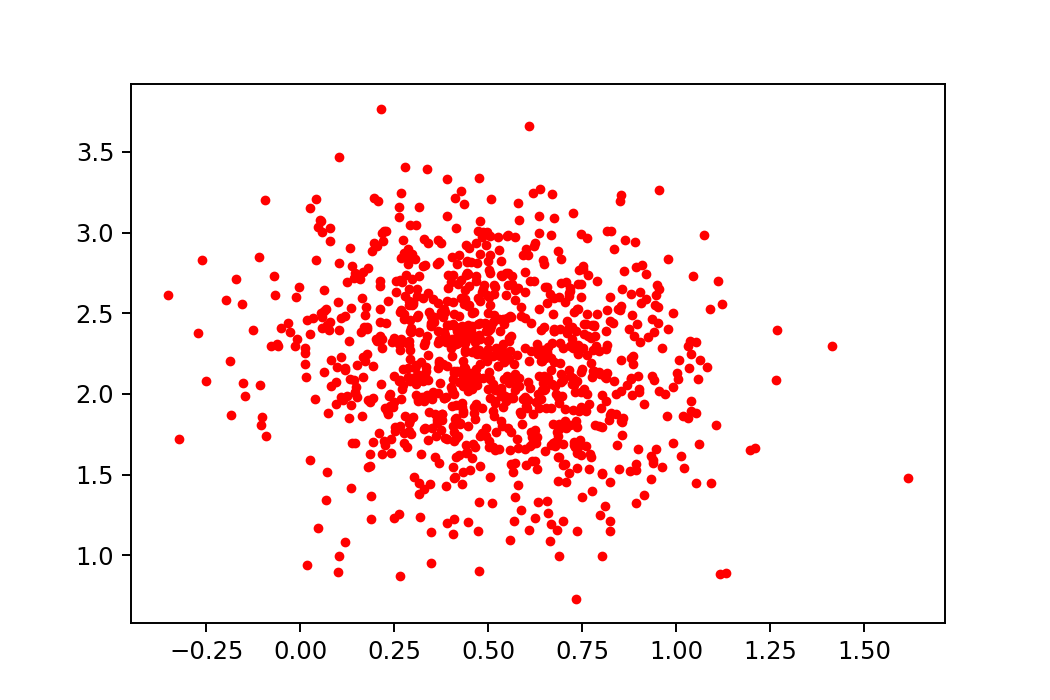

<IPython.core.display.Javascript object>


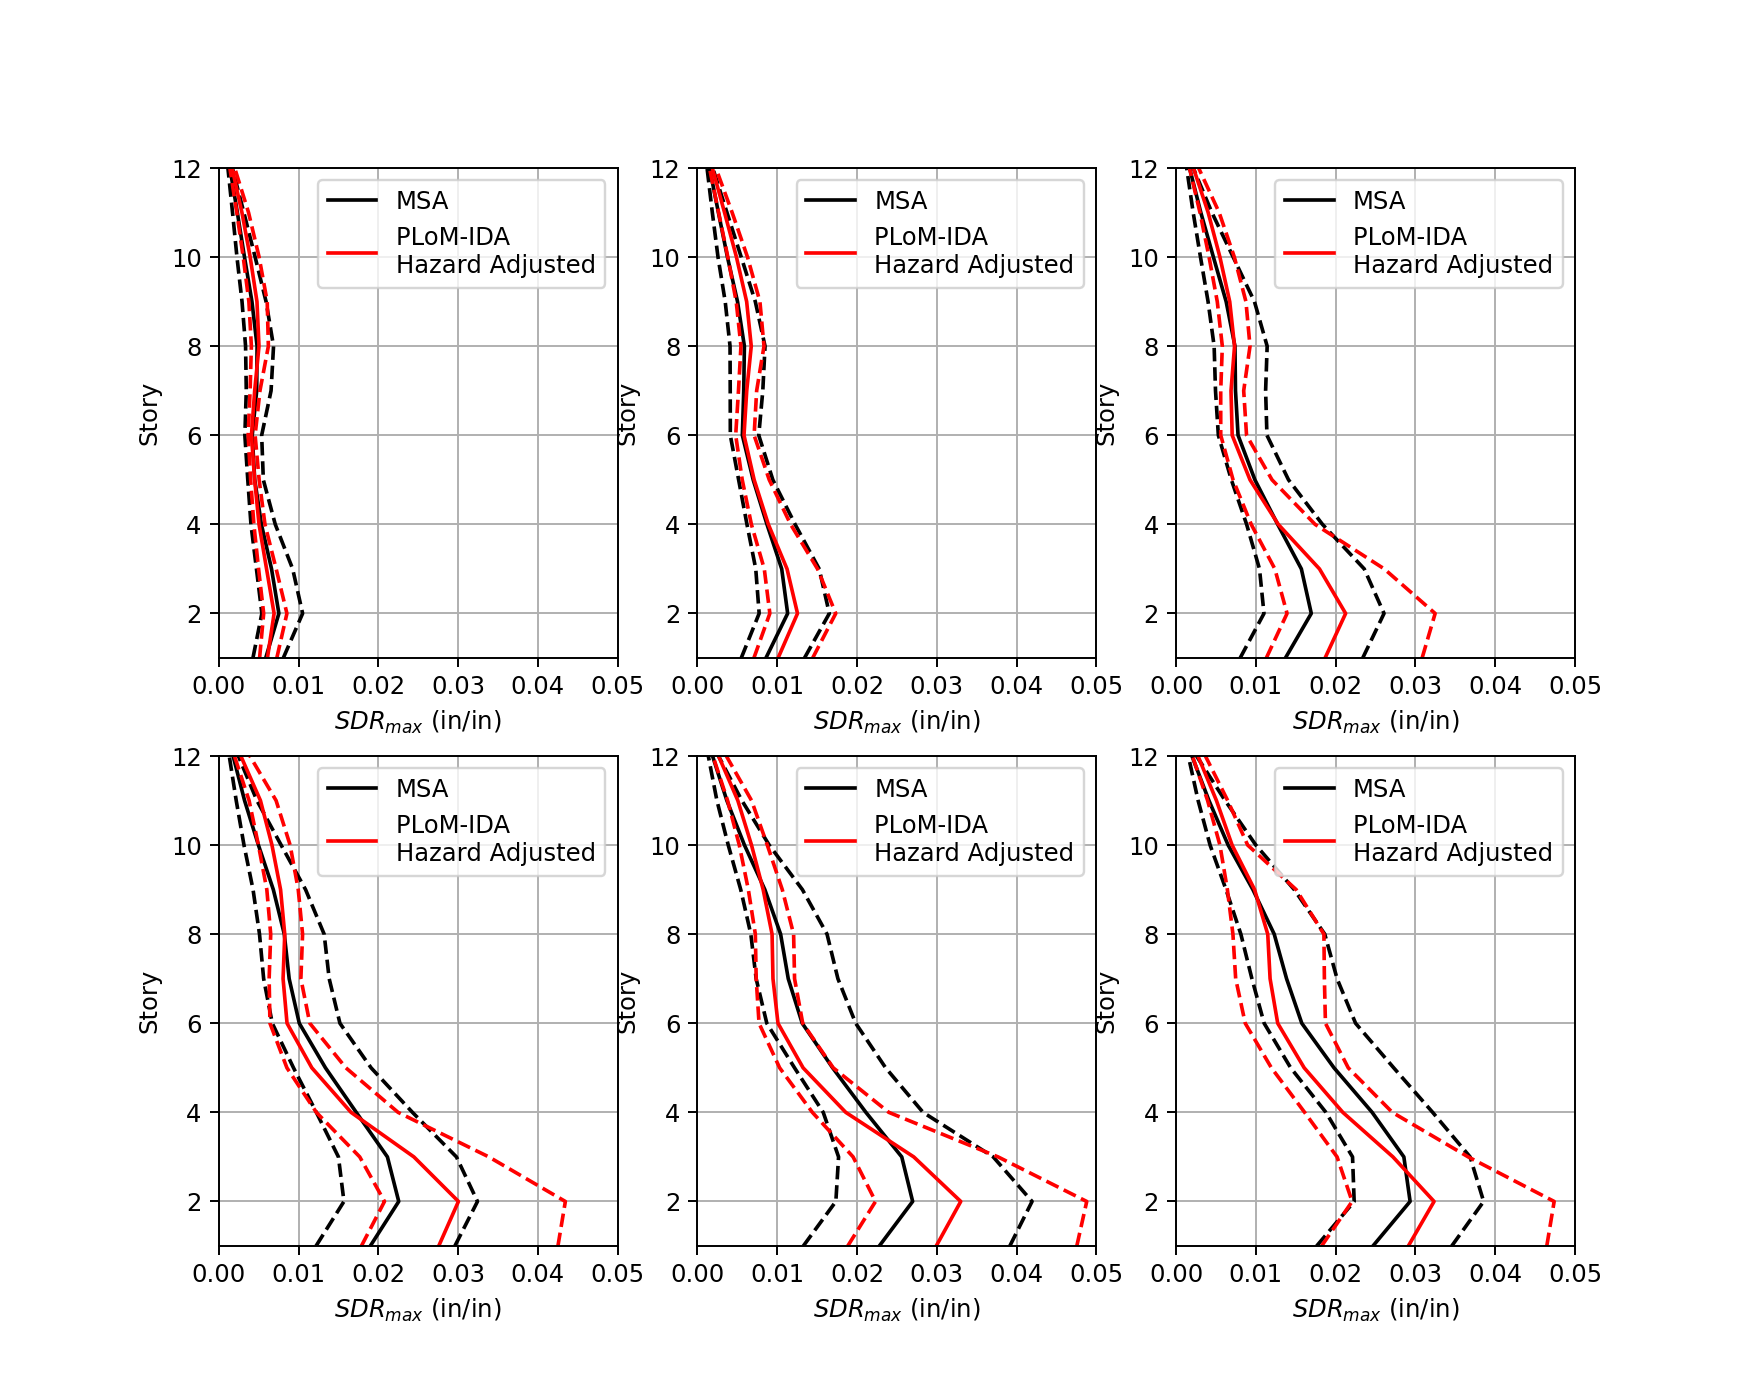

<IPython.core.display.Javascript object>


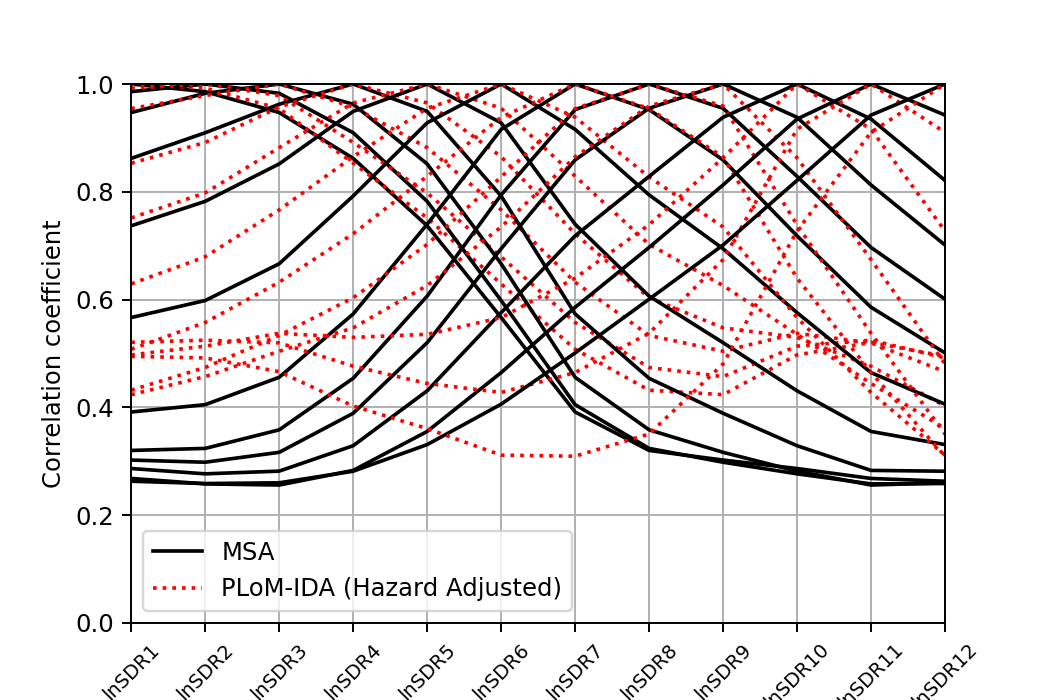

<IPython.core.display.Javascript object>


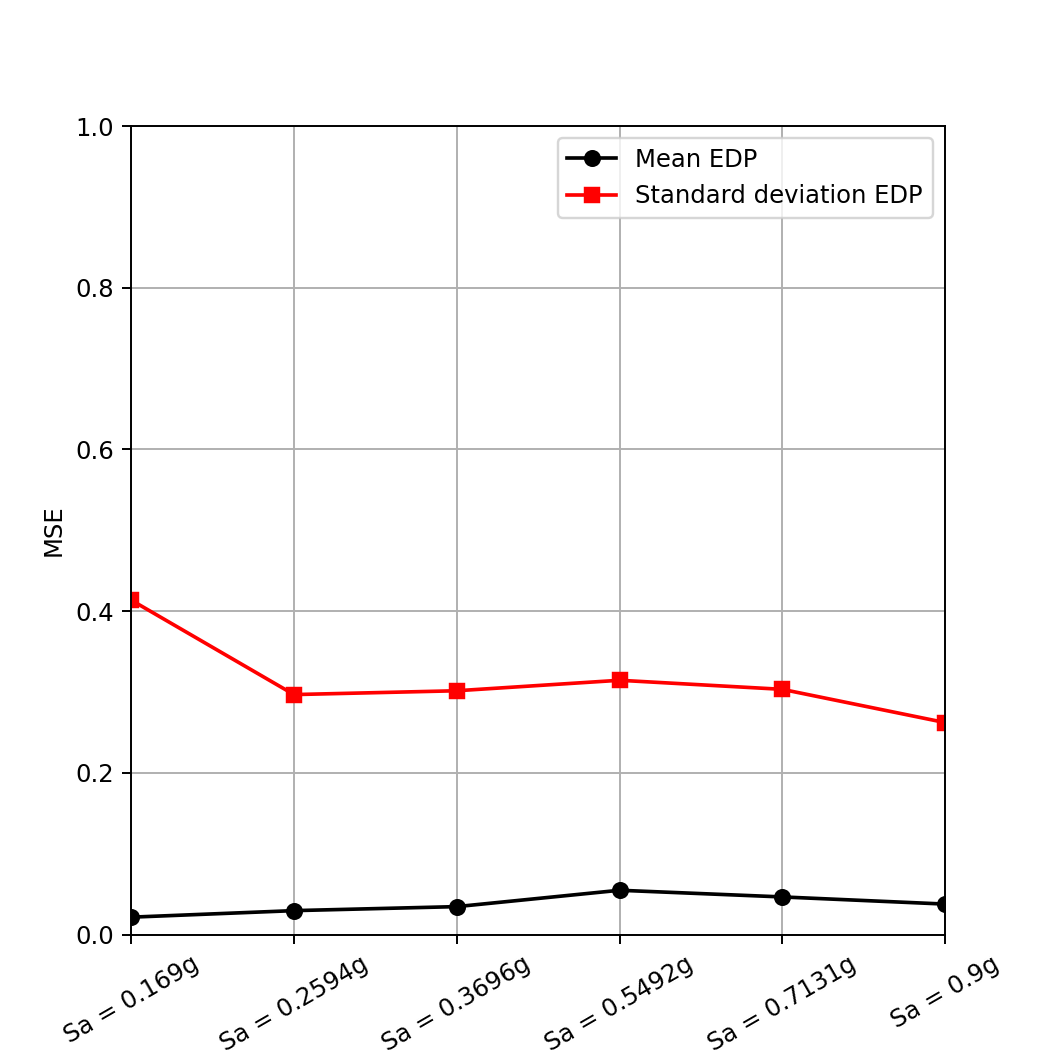

In [2]:
%run "../example2/ExampleScript_IDA.ipynb"

In [ ]:
# Save 
np.savetxt('plom_ida.csv',np.exp(np.array(res_conct)).T,delimiter=',')

# Generate uncorrelated samples for comparison
num_uc = 1000 # sample size (per Sa level)
uc_sample = pd.DataFrame()
for j in range(num_sa):
    for i in range(num_story):
        uc_sample['1-PID-'+str(i+1)+'-1'] = np.exp(np.random.normal(loc=np.log(sdr_cur_med_plom[i,j]),scale=sdr_cur_std_plom[i,j],size=num_uc))
        uc_sample['1-PFA-'+str(i+1)+'-1'] = 0.0*np.exp(np.random.normal(loc=np.log(pfa_cur_med_plom[i,j]),scale=pfa_cur_std_plom[i,j],size=num_uc))
    uc_sample['1-PRD-1-1'] = uc_sample['1-PID-2-1']
    uc_sample.to_csv('plom_ida_uc_s'+str(j+1)+'.csv',index_label='#Num')

### Damage and Loss
This section is going to process the structural damage and loss estimation results. The SDR data are used as the input EDP to pelicun. Lognormal distribution is assumed for the input SDR sample in pelicun. The HAZUS-MH module is used, and the damage model is selected for high-rise concrete moment frame (C1H) with moderate-code design level and the occupancy type of COM1. Comparisons between MSA and PLoM results are made.

<IPython.core.display.Javascript object>


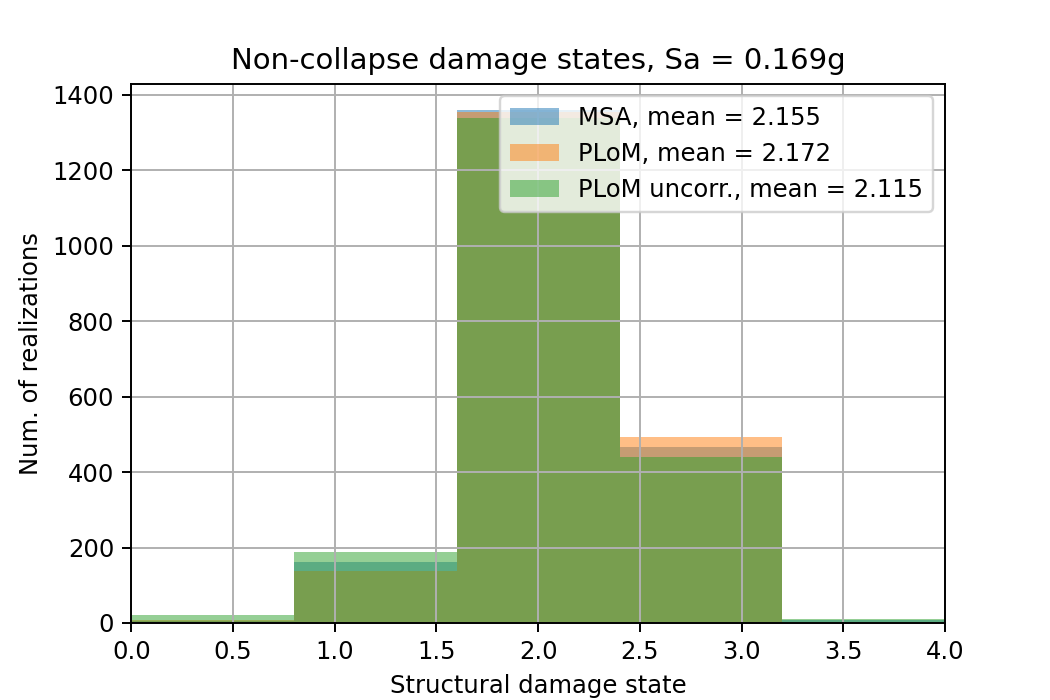

<IPython.core.display.Javascript object>


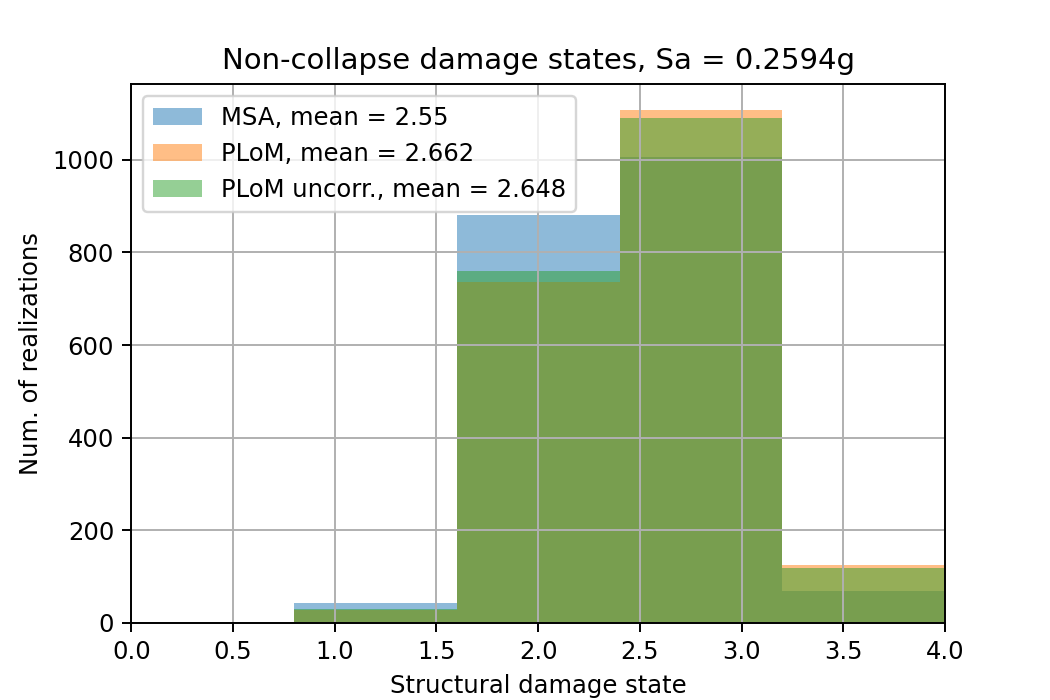

<IPython.core.display.Javascript object>


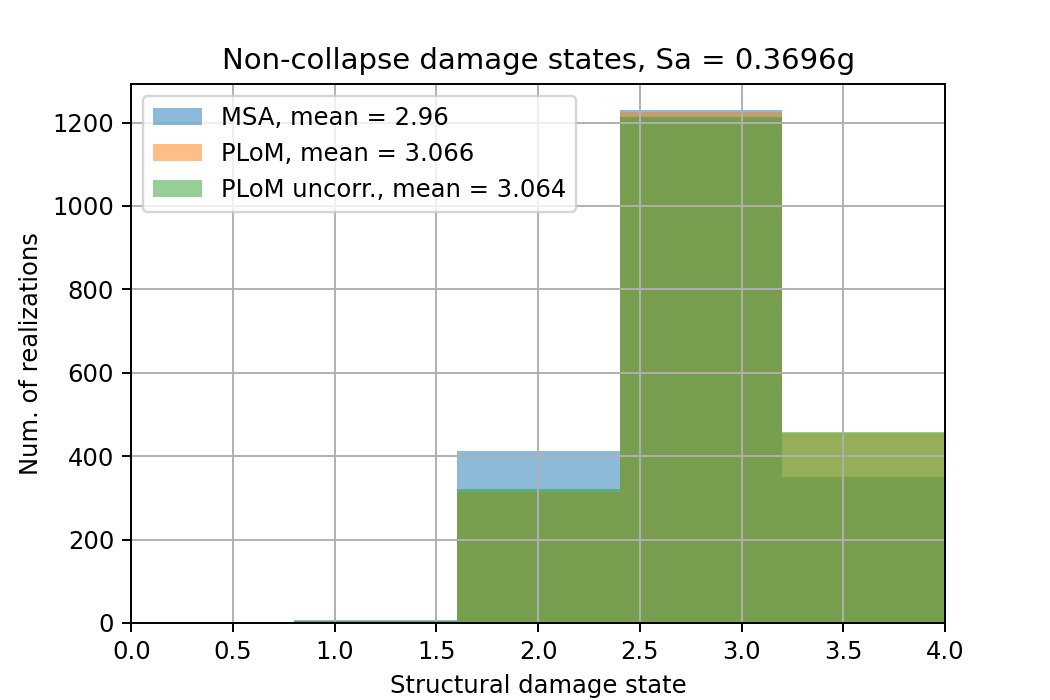

<IPython.core.display.Javascript object>


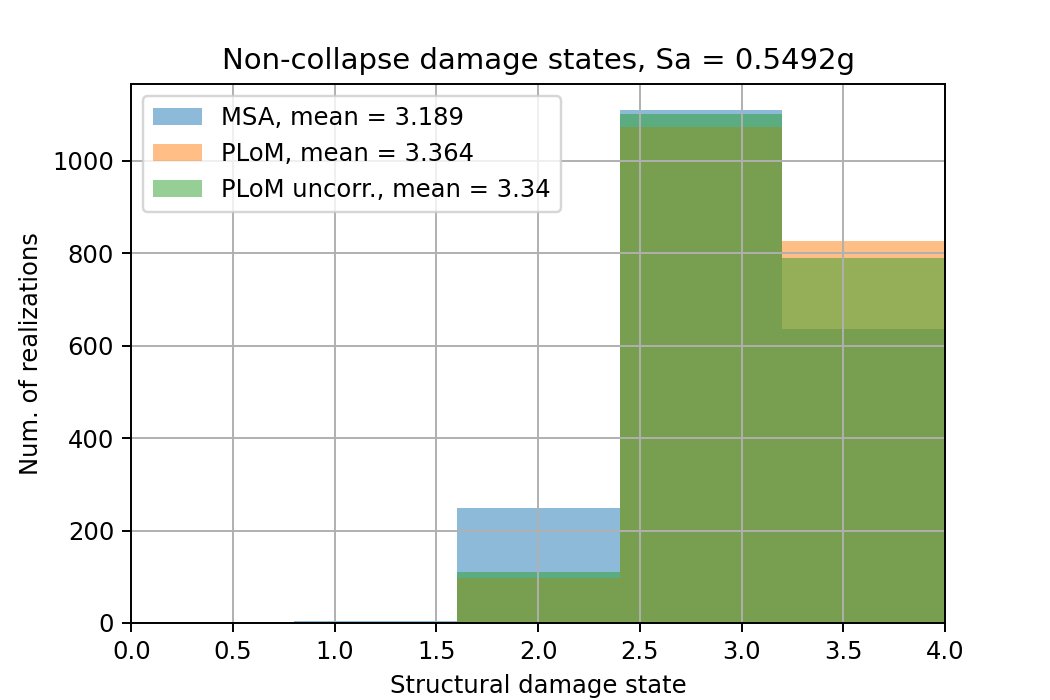

In [4]:
# Damage states
import pandas as pd
df_damage = pd.DataFrame()
for i in range(4):
    df_tmp = pd.read_csv('./data/'+'msa_s'+str(i+1)+'/DL_summary.csv')
    df_damage['msa-s'+str(i+1)] = df_tmp['highest_damage_state/S'] # extract the structural damage states
    df_tmp = pd.read_csv('./data/'+'plom_s'+str(i+1)+'/DL_summary.csv')
    df_damage['plom-s'+str(i+1)] = df_tmp['highest_damage_state/S'] # extract the structural damage states
    df_tmp = pd.read_csv('./data/'+'plom_uc_s'+str(i+1)+'/DL_summary.csv')
    df_damage['plom-uc-s'+str(i+1)] = df_tmp['highest_damage_state/S'] # extract the structural damage states
for i in range(4):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(df_damage['msa-s'+str(i+1)],bins=5,range=(0.0,4.0),alpha=0.5,label='MSA, mean = '+str(np.round(np.mean(df_damage['msa-s'+str(i+1)]),3)))
    ax.hist(df_damage['plom-s'+str(i+1)],bins=5,range=(0.0,4.0),alpha=0.5,label='PLoM, mean = '+str(np.round(np.mean(df_damage['plom-s'+str(i+1)]),3)))
    ax.hist(df_damage['plom-uc-s'+str(i+1)],bins=5,range=(0.0,4.0),alpha=0.5,label='PLoM uncorr., mean = '+str(np.round(np.mean(df_damage['plom-uc-s'+str(i+1)]),3))) 
    ax.set_xlim([0.0,4])
    ax.set_xlabel('Structural damage state')
    ax.set_ylabel('Num. of realizations')
    ax.legend()
    ax.grid()
    ax.set_title('Non-collapse damage states, Sa = '+str(sa_levels[i])+'g')
    plt.show()

<IPython.core.display.Javascript object>


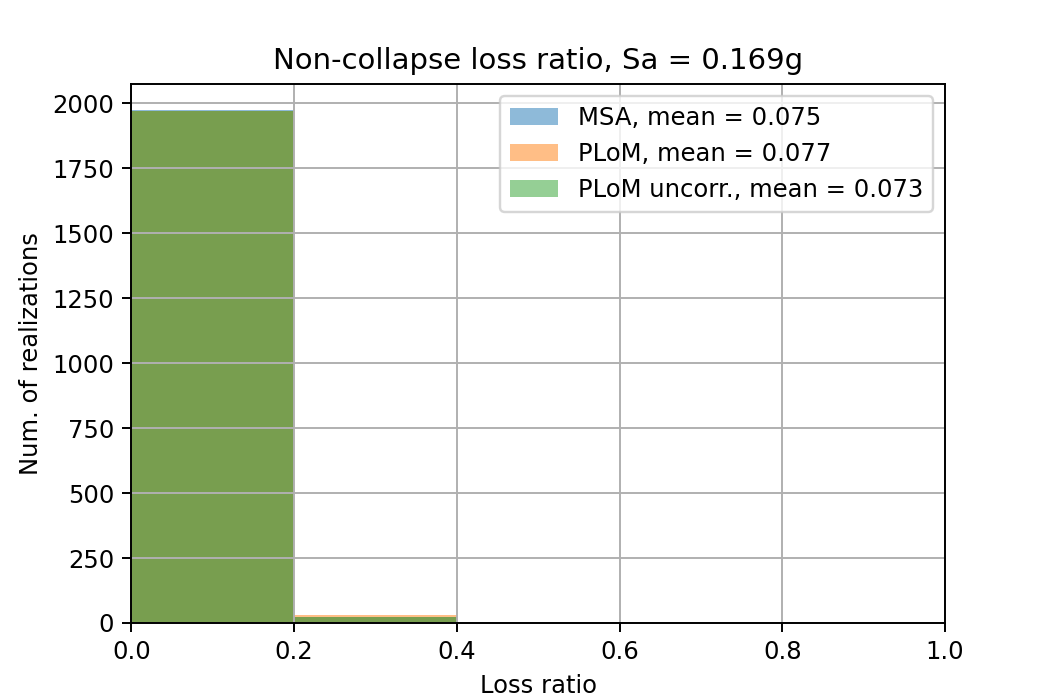

<IPython.core.display.Javascript object>


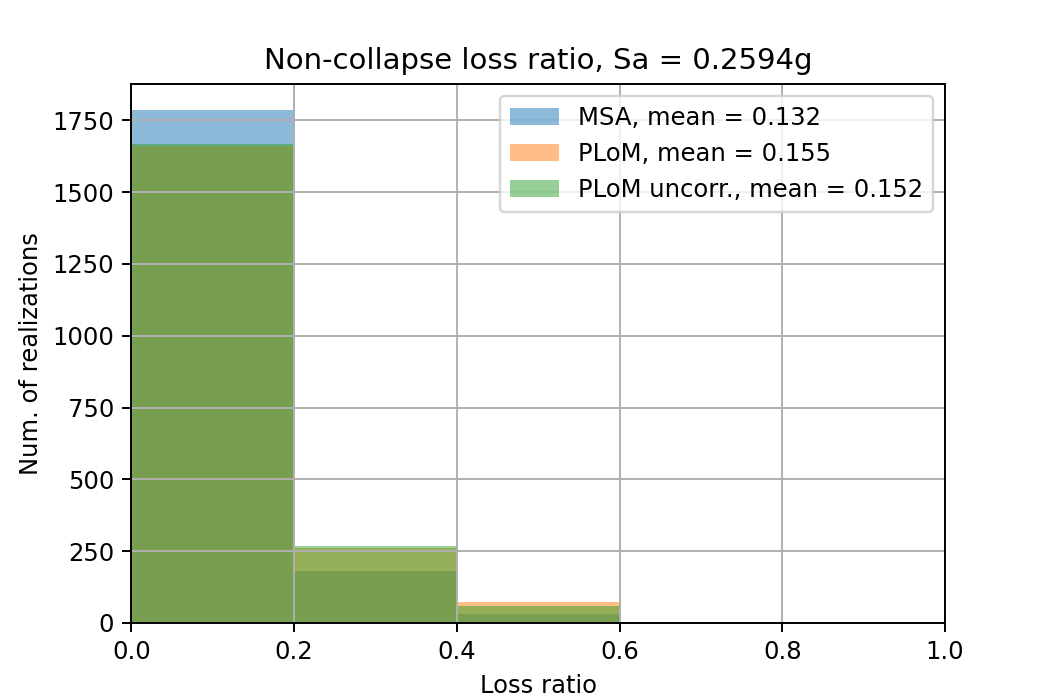

<IPython.core.display.Javascript object>


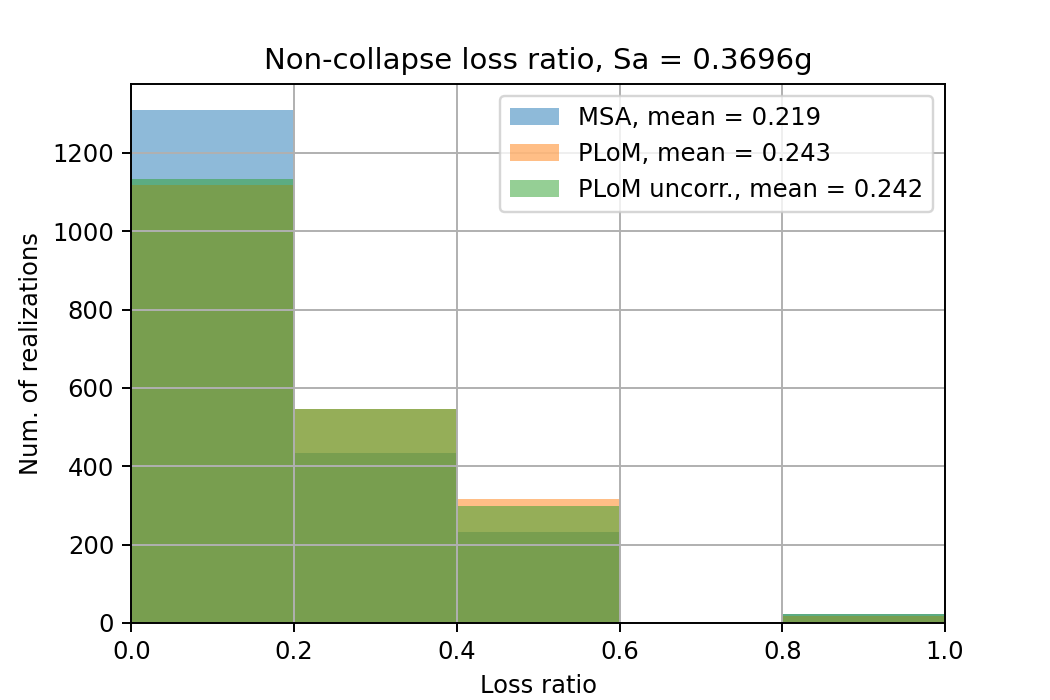

<IPython.core.display.Javascript object>


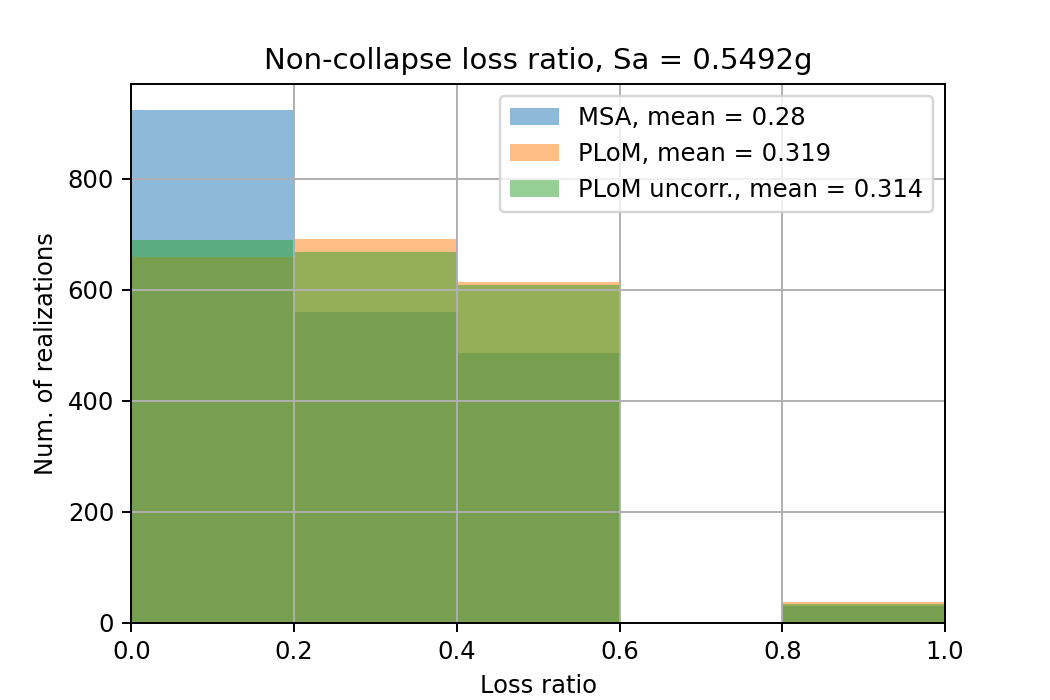

In [5]:
# Expected loss ratios
import pandas as pd
df_loss = pd.DataFrame()
for i in range(4):
    df_tmp = pd.read_csv('./data/'+'msa_s'+str(i+1)+'/DL_summary.csv')
    df_loss['msa-s'+str(i+1)] = df_tmp['reconstruction/cost'] # extract the structural damage states
    df_tmp = pd.read_csv('./data/'+'plom_s'+str(i+1)+'/DL_summary.csv')
    df_loss['plom-s'+str(i+1)] = df_tmp['reconstruction/cost'] # extract the structural damage states
    df_tmp = pd.read_csv('./data/'+'plom_uc_s'+str(i+1)+'/DL_summary.csv')
    df_loss['plom-uc-s'+str(i+1)] = df_tmp['reconstruction/cost'] # extract the structural damage states
for i in range(4):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(df_loss['msa-s'+str(i+1)],bins=5,range=(0.0,1.0),alpha=0.5,label='MSA, mean = '+str(np.round(np.mean(df_loss['msa-s'+str(i+1)]),3)))
    ax.hist(df_loss['plom-s'+str(i+1)],bins=5,range=(0.0,1.0),alpha=0.5,label='PLoM, mean = '+str(np.round(np.mean(df_loss['plom-s'+str(i+1)]),3)))
    ax.hist(df_loss['plom-uc-s'+str(i+1)],bins=5,range=(0.0,1.0),alpha=0.5,label='PLoM uncorr., mean = '+str(np.round(np.mean(df_loss['plom-uc-s'+str(i+1)]),3))) 
    ax.set_xlim([0.0,1])
    ax.set_xlabel('Loss ratio')
    ax.set_ylabel('Num. of realizations')
    ax.legend()
    ax.grid()
    ax.set_title('Non-collapse loss ratio, Sa = '+str(sa_levels[i])+'g')
    plt.show()